# Pre-processing and Training Data Development

In [1]:
#Load relevant Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [4]:
# Load files
shots_07_22_cleaned = pd.read_csv(r"C:\Users\Travi\OneDrive\Documents\GitHub\Springboard-Data-Science-Capstone-Project-2\Cleaned_data\shots_07_22_cleaned.csv")
shots_07_22_cleaned = shots_07_22_cleaned.drop(columns='shooterName')

# View loaded data
shots_07_22_cleaned.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS,power_play,situation,distance_bin,angle_bin,angle_bin_str
0,0,NSH,SJS,2022,20001,8,1.0,6,1,AWAY,...,0.022987,0.710473,1.0,SJS,47.0,0,5v5,"(44, 46]","[10, 15)","[10, 15)"
1,2,NSH,SJS,2022,20001,15,2.0,3,1,HOME,...,0.027936,0.644651,1.0,NSH,31.0,0,5v5,"(56, 58]","[-10, -5)","[-10, -5)"
2,3,NSH,SJS,2022,20001,16,0.0,2,1,HOME,...,0.024885,0.898032,1.0,NSH,76.0,0,5v5,"(14, 16]","[15, 20)","[15, 20)"
3,4,NSH,SJS,2022,20001,18,1.0,11,1,HOME,...,0.019556,0.759405,1.0,NSH,82.0,0,5v5,"(16, 18]","[-65, -60)","[-65, -60)"
4,6,NSH,SJS,2022,20001,26,25.0,7,1,AWAY,...,0.022000,0.536515,1.0,SJS,75.0,0,5v5,"(16, 18]","[5, 10)","[5, 10)"


In [5]:
#I then dropped all columns that will not be needed for my final model based on domain knowledge

cols_to_keep = ['shotID', 'homeTeamCode', 'awayTeamCode', 'season', 'game_id','id', 'location',
            'period', 'team', 'goal', 'shotGeneratedRebound', 'xCordAdjusted', 'yCordAdjusted',
            'shotAngle', 'shotAngleAdjusted', 'shotAnglePlusRebound',
            'shotDistance', 'shotType', 'shotOnEmptyNet', 'shotRebound', 'shotAnglePlusReboundSpeed', 
            'speedFromLastEvent', 'lastEventShotAngle', 'lastEventShotDistance', 'lastEventCategory', 'homeEmptyNet',
            'awayEmptyNet', 'homeSkatersOnIce', 'awaySkatersOnIce', 'awayPenalty1Length', 
            'homePenalty1Length', 'playerPositionThatDidEvent', 
            'lastEventxCord_adjusted', 'lastEventyCord_adjusted', 'shooterPlayerId',
            'shooterLeftRight', 'xGoal', 'xFroze',
            'xRebound', 'xPlayContinuedInZone', 'xPlayContinuedOutsideZone', 'xPlayStopped',
            'xShotWasOnGoal', 'shotWasOnGoal', 'teamCode', 'power_play', 'situation']
shots_07_22_cleaned = shots_07_22_cleaned[shots_07_22_cleaned.columns.intersection(cols_to_keep)]
shots_07_22_cleaned.reset_index()
shots_07_22_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239049 entries, 0 to 1239048
Data columns (total 47 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   shotID                      1239049 non-null  int64  
 1   homeTeamCode                1239049 non-null  object 
 2   awayTeamCode                1239049 non-null  object 
 3   season                      1239049 non-null  int64  
 4   game_id                     1239049 non-null  int64  
 5   id                          1239049 non-null  int64  
 6   period                      1239049 non-null  int64  
 7   team                        1239049 non-null  object 
 8   location                    1239049 non-null  object 
 9   goal                        1239049 non-null  int64  
 10  shotGeneratedRebound        1239049 non-null  int64  
 11  xCordAdjusted               1239049 non-null  int64  
 12  yCordAdjusted               1239049 non-null  int64  
 1

## Train/Test Split

To help prevent data leakage we will split the data first.  

Additionally, due to my large data set I will use a 98/1/1 split for train, validation, and test respectively.

In [6]:
# Seperating target variable
X = shots_07_22_cleaned['goal']
y = shots_07_22_cleaned.drop(columns='goal')

# Splitting the data into a 98/1/1 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=47)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.01, random_state=47)

In [7]:
# View training split 
y_train.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,period,team,location,shotGeneratedRebound,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,power_play,situation
1102684,610234,ANA,MIN,2008,20985,204,3,AWAY,HOMEZONE,0,...,0.175586,0.038327,0.424444,0.325773,0.023920,0.662461,1.0,MIN,0,5v5
390925,325408,BUF,VAN,2018,20242,254,3,HOME,AWAYZONE,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,BUF,1,5v4
627279,1270476,CHI,STL,2015,20182,162,2,AWAY,HOMEZONE,0,...,0.151583,0.042834,0.431034,0.291123,0.022071,0.715173,1.0,STL,0,5v5
780855,1082628,CAR,PIT,2013,20571,42,1,HOME,AWAYZONE,0,...,0.147223,0.041513,0.446968,0.304923,0.023331,0.669968,1.0,CAR,0,5v5
852514,957123,TOR,BUF,2011,21171,183,2,AWAY,HOMEZONE,0,...,0.185953,0.082265,0.371122,0.268402,0.024842,0.828353,1.0,BUF,0,5v5


In [8]:
# View test split
y_test.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,period,team,location,shotGeneratedRebound,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,power_play,situation
805801,1022126,BOS,PIT,2012,20654,289,3,AWAY,HOMEZONE,0,...,0.136676,0.045736,0.463963,0.309681,0.020004,0.588444,1.0,PIT,0,5v5
229766,196284,NYI,PIT,2020,30116,302,3,HOME,AWAYZONE,0,...,0.165576,0.050515,0.492223,0.239852,0.020077,0.684152,1.0,NYI,1,5v4
623401,1275892,BUF,SJS,2015,20248,138,2,AWAY,HOMEZONE,0,...,0.250235,0.022854,0.346354,0.346090,0.027306,0.769847,1.0,SJS,0,5v5
21756,30240,STL,DAL,2022,20350,264,3,HOME,AWAYZONE,0,...,0.164803,0.039749,0.460902,0.291940,0.019520,0.756097,1.0,STL,0,5v5
129381,58045,MTL,EDM,2021,20772,138,2,HOME,AWAYZONE,0,...,0.141874,0.042496,0.476367,0.282344,0.021609,0.657520,1.0,MTL,0,5v5


In [9]:
y_val.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,period,team,location,shotGeneratedRebound,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,power_play,situation
664843,1218432,TOR,WPG,2014,20875,191,2,AWAY,HOMEZONE,0,...,0.195319,0.024925,0.413148,0.335974,0.023007,0.682976,1.0,WPG,0,5v5
866663,937390,MIN,SJS,2011,20930,160,2,HOME,AWAYZONE,0,...,0.173921,0.032758,0.314614,0.438553,0.019594,0.732970,1.0,MIN,0,5v5
115222,38765,EDM,CBJ,2021,20463,92,1,AWAY,HOMEZONE,0,...,0.197626,0.042490,0.474723,0.256395,0.023962,0.784700,1.0,CBJ,1,5v4
986294,771355,COL,SJS,2010,20265,37,1,AWAY,HOMEZONE,0,...,0.272191,0.037960,0.368098,0.284241,0.019094,0.732287,1.0,SJS,0,5v5
101976,20691,SEA,CHI,2021,20246,97,2,AWAY,Neu. Zone,0,...,0.159304,0.009404,0.248409,0.556357,0.019536,0.877068,1.0,CHI,0,5v5


## Encoding Categorical Columns

Now that the data as been split into a training and test set, I will examine the categorical columns for encoding.

In [9]:
# Create list of categorical columns
y_train_cat = y_train.select_dtypes(object)
cols = y_train_cat.columns

Now that I have a list of my categorical columns that will need to be encoded, I want to see how many levels are in each categorical feature. This will help me to decide on the proper encoding method.

In [10]:
# Calculating number of levels for the remaining categorical columns
for col in y_train[cols]:
    print(f"{col} = {y_train[col].nunique()} categories")

homeTeamCode = 33 categories
awayTeamCode = 33 categories
team = 2 categories
shotType = 7 categories
lastEventCategory = 18 categories
playerPositionThatDidEvent = 5 categories
shooterLeftRight = 2 categories
teamCode = 33 categories


#### One-hot Encoding

 There are a 3 different features that have only 2 levels. These are "binary' type features, therefore, I decided to encode them with a simple 0 or 1.

In [10]:
# Encoding columns with only 2 levels with one-hot encoding on the training set
y_train['team'] = y_train['team'].map({'HOME':0, 'AWAY':1})
y_train['shooterLeftRight'] = y_train['shooterLeftRight'].map({'R':0, 'L':1})
y_train[['team', 'shooterLeftRight']].head()

,team,shooterLeftRight
1102684,1,0
390925,0,1
627279,1,0
780855,0,0
852514,1,1


In [11]:
# Encoding columns with only 2 levels with one-hot encoding on the test set
y_test['team'] = y_test['team'].map({'HOME':0, 'AWAY':1})
y_test['shooterLeftRight'] = y_test['shooterLeftRight'].map({'R':0, 'L':1})
y_test[['team', 'shooterLeftRight']].head()

,team,shooterLeftRight
805801,1,0
229766,0,1
623401,1,1
21756,0,1
129381,0,0


In [12]:
# Encoding columns with only 2 levels with one-hot encoding on the validation set
y_val['team'] = y_val['team'].map({'HOME':0, 'AWAY':1})
y_val['shooterLeftRight'] = y_val['shooterLeftRight'].map({'R':0, 'L':1})
y_val[['team', 'shooterLeftRight']].head()

,team,shooterLeftRight
664843,1,1
866663,0,0
115222,1,1
986294,1,1
101976,1,0


#### Target Encoding

Now that I have encoded all of my 2 level features, I will perform target encoding on categories believed to have a correlation to our target. I want to help capture their relationship to the target.

In [13]:
# Columns for target encoding
cols_target = ['playerPositionThatDidEvent','lastEventCategory', 'shotType']
# Target encoder
encoder = ce.TargetEncoder(cols= cols_target, smoothing=10, return_df=True)

In [14]:
# Encode the training set
y_train_transformed = encoder.fit_transform(y_train, X_train)
y_test_transformed = encoder.transform(y_test)
y_val_transformed = encoder.transform(y_val)
y_train_transformed[cols_target].head()

,playerPositionThatDidEvent,lastEventCategory,shotType
1102684,0.106651,0.094425,0.059966
390925,0.109239,0.071519,0.109943
627279,0.106651,0.068942,0.095543
780855,0.106651,0.094425,0.095543
852514,0.109004,0.068942,0.109943


In [15]:
y_test_transformed[cols_target].head()

,playerPositionThatDidEvent,lastEventCategory,shotType
805801,0.049602,0.102890,0.059966
229766,0.109239,0.123803,0.089126
623401,0.109239,0.094425,0.089126
21756,0.109004,0.112780,0.089126
129381,0.106651,0.068942,0.089126


In [16]:
y_val_transformed[cols_target].head()

,playerPositionThatDidEvent,lastEventCategory,shotType
664843,0.049602,0.071519,0.089126
866663,0.106651,0.094425,0.095543
115222,0.106651,0.071519,0.095543
986294,0.109239,0.112780,0.109943
101976,0.109004,0.094425,0.089126


#### Frequancy Encoding

I will encode the remaining columns with frequancy encoding as the relationship to the target is not as important with these features. 

In [17]:
# Columns to encode
cols_freq = ['homeTeamCode', 'awayTeamCode', 'situation', 'teamCode', 'location' ]

# Function to apply frequency encoding
def frequency_encode(train, test, val, columns):
    """
    Encode categorical columns of a dataset with frequency counts of each level within specified column.
    
    Parameters:
    train (pd.DataFrame): Training DataFrame to encode.
    test (pd.DataFrame): Test DataFrame to encode.
    val (pd.DataFrame): Validation DataFrame to encode.
    columns (list): List of columns within DataFrame to encode.
    """
    for col in columns:
        # Calculate frequency counts on the training set
        frequency_map = train[col].value_counts()  # Absolute counts

        # Map frequencies to the train, test, and validation sets
        train[col] = train[col].map(frequency_map)
        test[col] = test[col].map(frequency_map).fillna(0)  # Fill unseen categories with 0
        val[col] = val[col].map(frequency_map).fillna(0)  # Fill unseen categories with 0
    return train, test, val

In [18]:
# Encode the training and test set
y_train_encoded, y_test_encoded, y_val_encoded = frequency_encode(y_train_transformed, y_test_transformed, y_val_transformed, cols_freq)

# View encoded training set
y_train_encoded.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,period,team,location,shotGeneratedRebound,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,power_play,situation
1102684,610234,40200,38985,2008,20985,204,3,1,572383,0,...,0.175586,0.038327,0.424444,0.325773,0.023920,0.662461,1.0,37241,0,975568
390925,325408,38110,39176,2018,20242,254,3,0,606131,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,36650,1,176540
627279,1270476,41941,39471,2015,20182,162,2,1,572383,0,...,0.151583,0.042834,0.431034,0.291123,0.022071,0.715173,1.0,39287,0,975568
780855,1082628,39532,42679,2013,20571,42,1,0,606131,0,...,0.147223,0.041513,0.446968,0.304923,0.023331,0.669968,1.0,41367,0,975568
852514,957123,39827,38089,2011,21171,183,2,1,572383,0,...,0.185953,0.082265,0.371122,0.268402,0.024842,0.828353,1.0,36650,0,975568


In [19]:
# View encoded test set
y_test_encoded.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,period,team,location,shotGeneratedRebound,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,power_play,situation
805801,1022126,43392,42679,2012,20654,289,3,1,572383,0,...,0.136676,0.045736,0.463963,0.309681,0.020004,0.588444,1.0,44757,0,975568
229766,196284,39649,42679,2020,30116,302,3,0,606131,0,...,0.165576,0.050515,0.492223,0.239852,0.020077,0.684152,1.0,38760,1,176540
623401,1275892,38110,40936,2015,20248,138,2,1,572383,0,...,0.250235,0.022854,0.346354,0.346090,0.027306,0.769847,1.0,42663,0,975568
21756,30240,38020,39518,2022,20350,264,3,0,606131,0,...,0.164803,0.039749,0.460902,0.291940,0.019520,0.756097,1.0,39287,0,975568
129381,58045,40587,38545,2021,20772,138,2,0,606131,0,...,0.141874,0.042496,0.476367,0.282344,0.021609,0.657520,1.0,40181,0,975568


In [20]:
# View encoded validation set
y_val_encoded.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,period,team,location,shotGeneratedRebound,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,power_play,situation
664843,1218432,39827,28547,2014,20875,191,2,1,572383,0,...,0.195319,0.024925,0.413148,0.335974,0.023007,0.682976,1.0,28615,0,975568
866663,937390,36663,40936,2011,20930,160,2,0,606131,0,...,0.173921,0.032758,0.314614,0.438553,0.019594,0.732970,1.0,37241,0,975568
115222,38765,38636,38208,2021,20463,92,1,1,572383,0,...,0.197626,0.042490,0.474723,0.256395,0.023962,0.784700,1.0,37687,1,176540
986294,771355,41078,40936,2010,20265,37,1,1,572383,0,...,0.272191,0.037960,0.368098,0.284241,0.019094,0.732287,1.0,42663,0,975568
101976,20691,4886,41407,2021,20246,97,2,1,35877,0,...,0.159304,0.009404,0.248409,0.556357,0.019536,0.877068,1.0,42250,0,975568


# Stadardization And Normalization

Now that encoding of the categorical features is complete. We will perform the last pre-processing step: Standardization And Normalization.  

We will start by applying log transformations to skewed features.

#### Log Transformation

In [21]:
# Check for skewness 
skewness = y_train_encoded.skew()

# Filter skewness values
skewed_features = skewness[(skewness < -1) | (skewness > 1)]
skewed_features = list(skewed_features.index)

# Print the skewed features
print(skewed_features)

['homeTeamCode', 'awayTeamCode', 'game_id', 'location', 'shotGeneratedRebound', 'shotAnglePlusRebound', 'shotType', 'shotOnEmptyNet', 'shotRebound', 'shotAnglePlusReboundSpeed', 'speedFromLastEvent', 'lastEventShotDistance', 'homeEmptyNet', 'awayEmptyNet', 'homeSkatersOnIce', 'awaySkatersOnIce', 'awayPenalty1Length', 'homePenalty1Length', 'shooterPlayerId', 'xGoal', 'xRebound', 'xPlayContinuedInZone', 'xPlayContinuedOutsideZone', 'xPlayStopped', 'xShotWasOnGoal', 'teamCode', 'power_play', 'situation']


In [22]:
# Apply log transformation to skewed features (using +1 to avoid log(0) issues)
y_train_encoded[skewed_features] = np.log1p(abs(y_train_encoded[skewed_features]))

# Apply the same transformation to the test set
y_test_encoded[skewed_features] = np.log1p(abs(y_test_encoded[skewed_features]))

# Apply the same transformation to the validation set
y_val_encoded[skewed_features] = np.log1p(abs(y_val_encoded[skewed_features]))

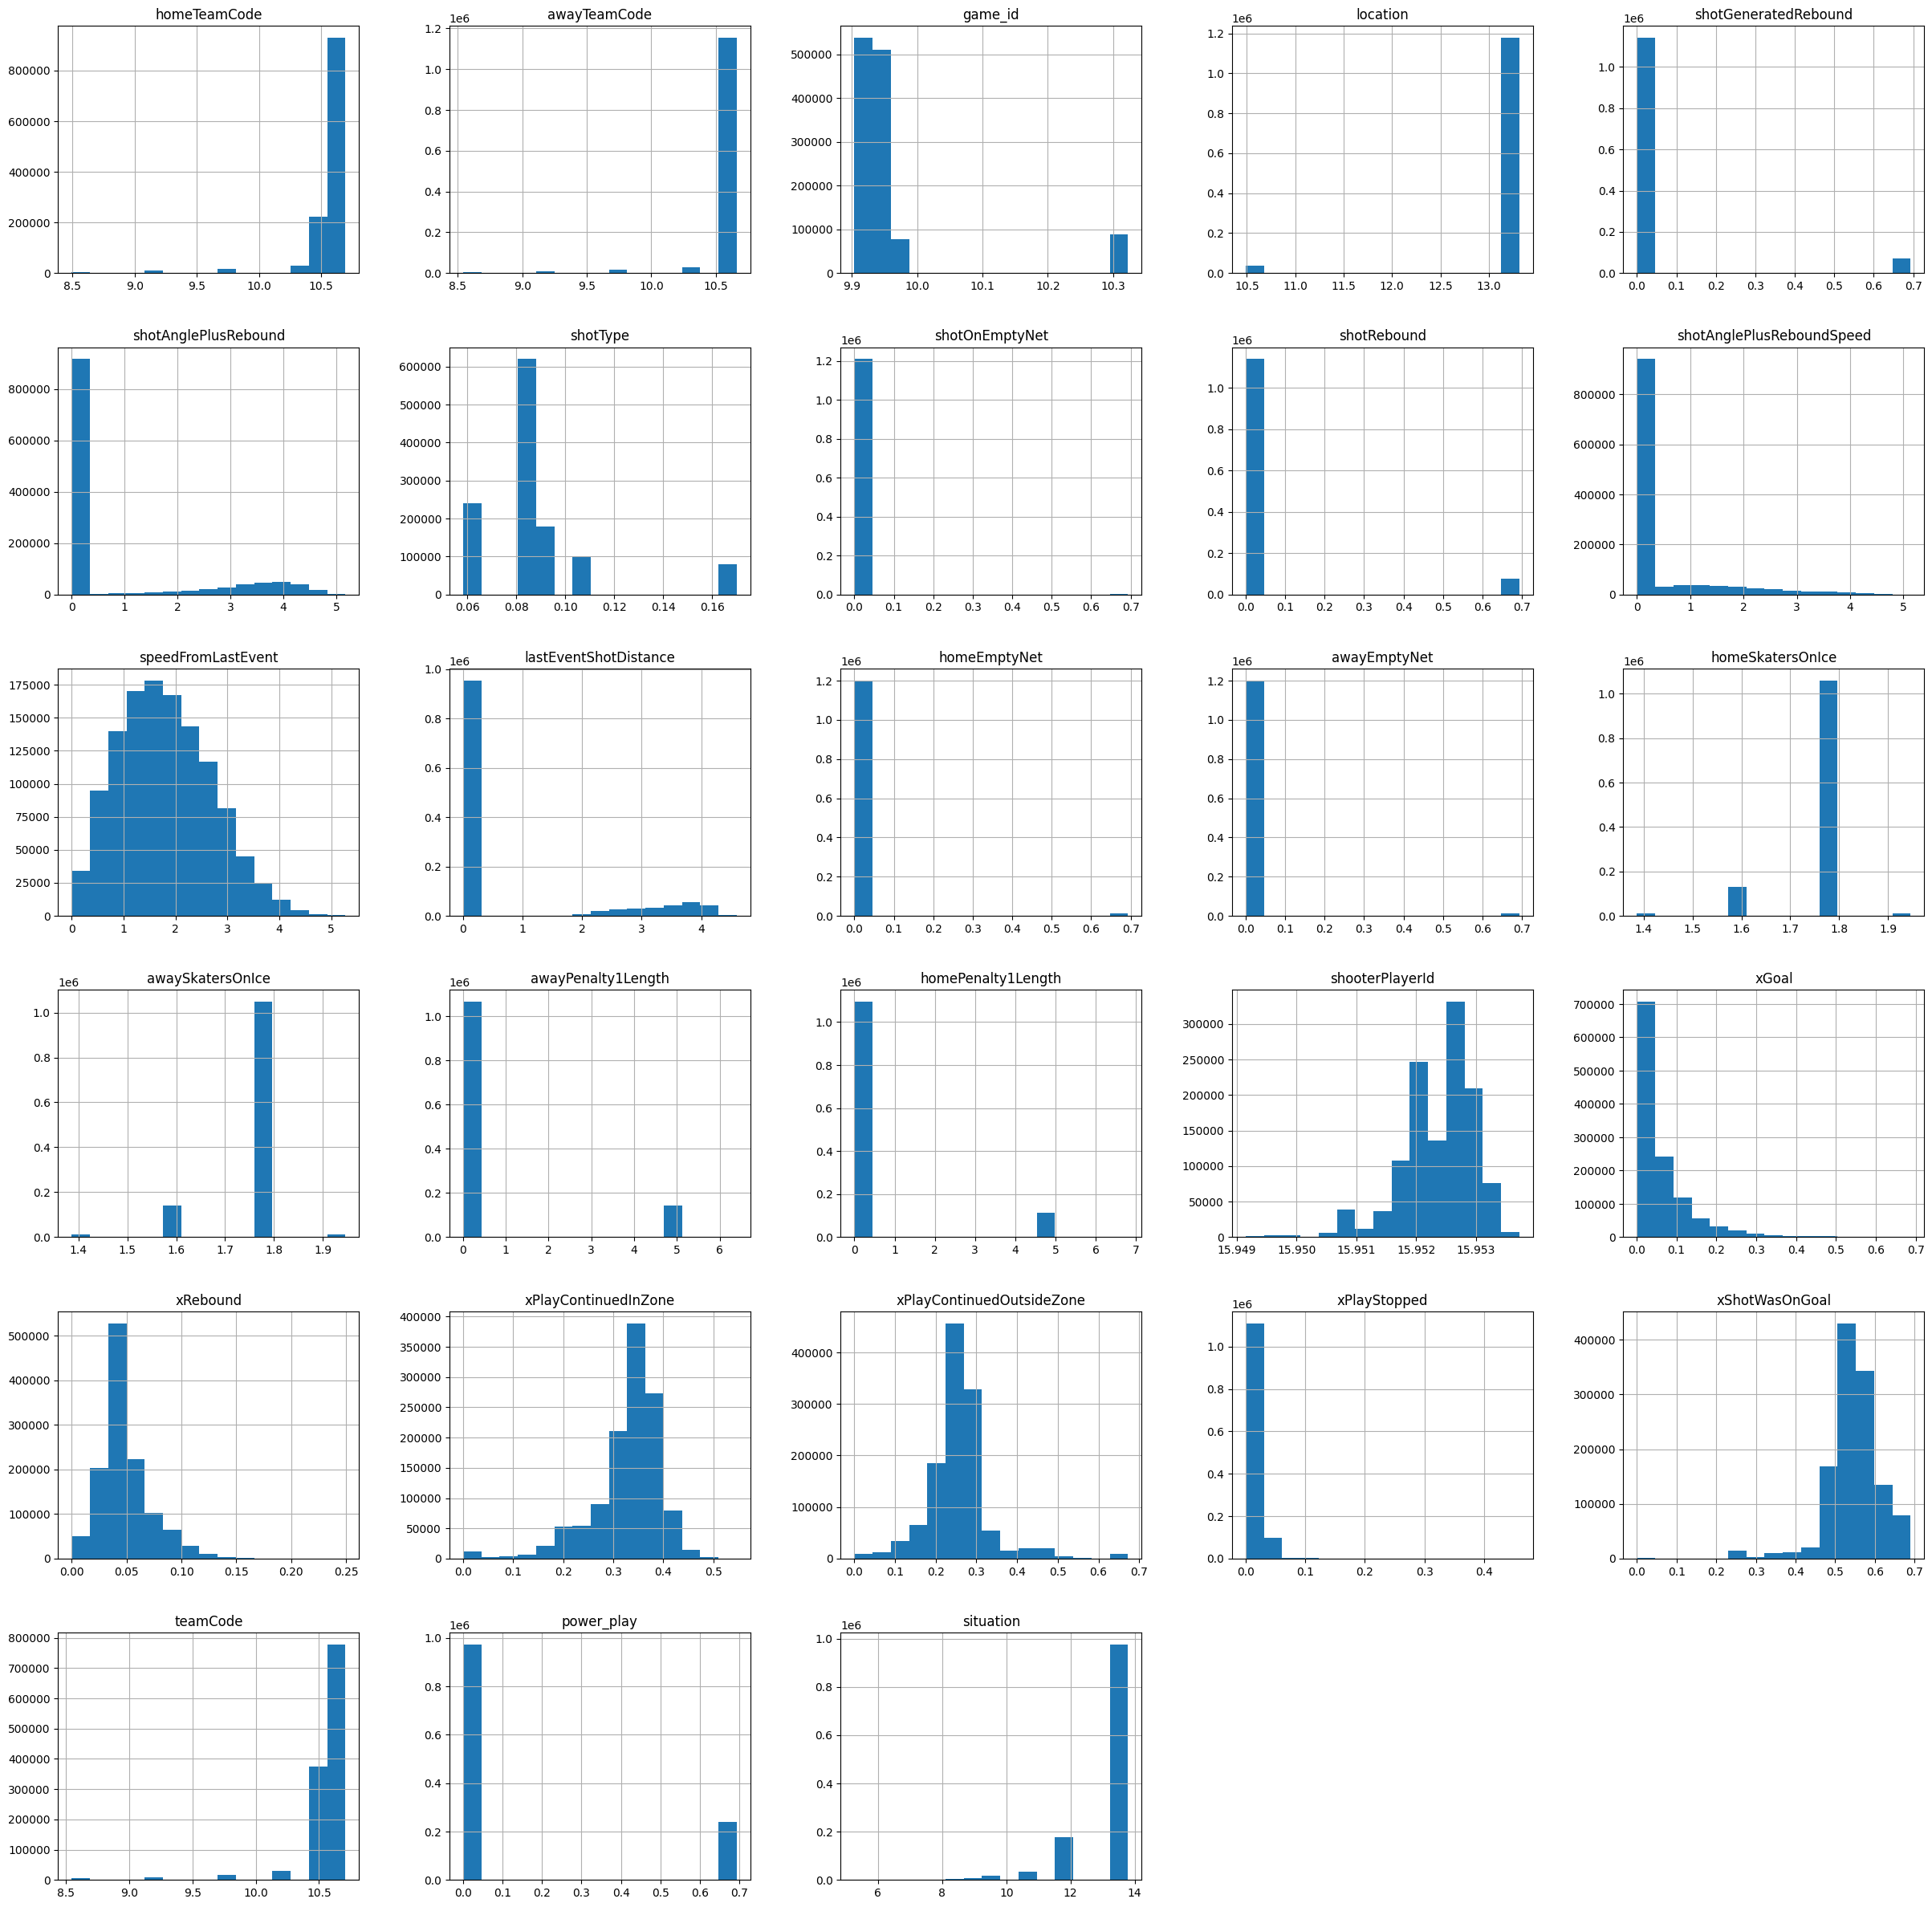

In [23]:
# View transformed distubutions
_=y_train_encoded[skewed_features].hist(bins= 15, figsize=(30,30))

#### Standard Scaler and Min-Max Scaler

Now that we have transformed our skewed columns, we will use a standard scaler to standardize the unbounded (non-probability based) columns and using a min_max scaler on the bounded (probability based) columns.

In [24]:
# Seperate columns for standard scaler and min-max scaler
bound_col = ['xGoal', 'xFroze','xRebound', 'xPlayContinuedInZone', 'xPlayContinuedOutsideZone', 'xPlayStopped', 'xShotWasOnGoal']
non_bound_col = list(y_train_encoded.drop(columns=bound_col).columns)

In [25]:
# Define the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), non_bound_col),
        ('minmax_scaler', MinMaxScaler(), bound_col)],
    remainder='passthrough'  # Leave other features unchanged
)

# Fit and transform the training data
y_train_scaled = pd.DataFrame(preprocessor.fit_transform(y_train_encoded), columns = y_train_encoded.columns)

# Apply the same transformation to the test data
y_test_scaled = pd.DataFrame(preprocessor.transform(y_test_encoded), columns = y_test_encoded.columns)

# Apply the same transformation to the validation data
y_val_scaled = pd.DataFrame(preprocessor.transform(y_val_encoded), columns = y_val_encoded.columns)

In [26]:
# View scaled training data
y_train_scaled.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,period,team,location,shotGeneratedRebound,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,power_play,situation
0,-0.277707,0.226595,0.085775,-1.414187,-0.091263,0.476040,1.142613,1.027793,0.112114,-0.251743,...,-0.128889,-0.497867,0.442215,0.015859,0.229595,0.150763,0.647379,0.419366,0.051490,0.736798
1,-0.867692,-0.021185,0.108523,0.733122,-0.449670,1.018592,1.142613,-0.972958,0.232771,-0.251743,...,-0.202389,2.008569,-1.242084,0.090661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.089909,0.423357,0.143441,0.088929,-0.479184,0.020296,-0.037594,1.027793,0.112114,-0.251743,...,0.116849,-0.497867,0.442215,0.085345,0.198209,0.168124,0.655825,0.379981,0.047554,0.782045
3,0.700803,0.148829,0.507149,-0.340533,-0.289372,-1.281830,-1.217801,-0.972958,0.232771,-0.251743,...,0.353887,-0.497867,0.442215,0.050157,0.192508,0.163042,0.676087,0.395792,0.050237,0.743329
4,0.440834,0.183333,-0.022449,-0.769995,-0.003527,0.248168,-0.037594,1.027793,0.112114,-0.251743,...,-0.202389,-0.497867,0.442215,0.093645,0.243151,0.316895,0.577565,0.353578,0.053452,0.874673


In [27]:
# View scaled test data
y_test_scaled.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,period,team,location,shotGeneratedRebound,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,power_play,situation
0,0.575480,0.581201,0.507149,-0.555264,-0.249337,1.398379,1.142613,1.027793,0.112114,-0.251743,...,0.715784,-0.497867,0.442215,0.033028,0.178717,0.179264,0.697455,0.401204,0.043144,0.670780
1,-1.135157,0.162545,0.507149,1.162584,3.500455,1.539443,1.142613,-0.972958,0.232771,-0.251743,...,0.054799,2.008569,-1.242084,0.044116,0.216506,0.197542,0.732442,0.319722,0.043299,0.755588
2,1.101128,-0.021185,0.313069,0.088929,-0.446723,-0.240129,-0.037594,1.027793,0.112114,-0.251743,...,0.495626,-0.497867,0.442215,0.008945,0.327206,0.090578,0.544208,0.441982,0.058682,0.827530
3,-1.479099,-0.032158,0.148980,1.592046,-0.396764,1.127103,1.142613,-0.972958,0.232771,-0.251743,...,0.116849,-0.497867,0.442215,0.031812,0.215496,0.156250,0.693625,0.380922,0.042110,0.816225
4,-1.421504,0.271059,0.032944,1.377315,-0.192696,-0.240129,-0.037594,-0.972958,0.232771,-0.251743,...,0.220232,-0.497867,0.442215,0.049127,0.185514,0.166825,0.712894,0.369835,0.046569,0.732483


In [28]:
# View scaled validation data
y_val_scaled.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,period,team,location,shotGeneratedRebound,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,power_play,situation
0,0.982106,0.183333,-1.364681,-0.125802,-0.143517,0.334976,-0.037594,1.027793,0.112114,-0.251743,...,-1.339481,-0.497867,0.442215,0.009619,0.255398,0.098689,0.632810,0.430764,0.049547,0.754576
1,0.399959,-0.200829,0.313069,-0.769995,-0.117356,-0.001406,-0.037594,-0.972958,0.232771,-0.251743,...,-0.128889,-0.497867,0.442215,0.028210,0.227418,0.129206,0.500552,0.540778,0.042267,0.797008
2,-1.461440,0.042432,-0.007930,1.377315,-0.341708,-0.739278,-1.217801,1.027793,0.112114,-0.251743,...,-0.074190,2.008569,-1.242084,0.005528,0.258415,0.166802,0.710855,0.339433,0.051580,0.839644
3,0.056037,0.326866,0.313069,-0.984725,-0.438379,-1.336085,-1.217801,1.027793,0.112114,-0.251743,...,0.495626,-0.497867,0.442215,0.025145,0.355915,0.149346,0.573525,0.372033,0.041200,0.796437
4,-1.498878,-9.553548,0.366317,1.377315,-0.447706,-0.685022,-0.037594,1.027793,-5.721259,-0.251743,...,0.450930,-0.497867,0.442215,0.008698,0.208305,0.037520,0.405996,0.657831,0.042144,0.912789


## Saving Data

We have now completed our pre-processing steps of splitting, encoding, and scaling our data. The last step is to save our newly transformed data. I will save both an unscaled and scaled version of the data set.  

The reason is that I will be experimenting with tree-based models (not sensitive to unscaled data) and non-tree based models (sensitive to unscaled data).

In [29]:
# Function to save my transformed files
def save_file(df, directory, filename):
    """
    Save the given DataFrame to the specified directory with the given filename.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to save.
    directory (str): The directory where the DataFrame will be saved.
    filename (str): The name of the file to save the DataFrame as.
    """
    file_path = f"{directory}/{filename}.csv"
    df.to_csv(file_path, index=False)

In [30]:
# Saving transformed files
directory = r'C:\Users\Travi\OneDrive\Documents\GitHub\Springboard-Data-Science-Capstone-Project-2\Cleaned_data\test'
file_names = {'y_train_unscaled': y_train_encoded, 'y_test_unscaled': y_test_encoded, 'y_train_scaled': y_train_scaled, 'y_test_scaled': y_test_scaled, \
              'X_train': X_train, 'X_test': X_test, 'y_val_unscaled': y_val_encoded, 'y_val_scaled': y_val_scaled}
for key, value in file_names.items():
    save_file(value, directory, key)